In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

In [3]:
# Load the xlsx file
excel_data = pd.read_excel("Heart_Disease_Prediction.xlsx")
# Read the values of the file in the dataframe
df = pd.DataFrame(excel_data)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,270.0,54.433333,9.109067,29.0,48.0,55.0,61.0,77.0
Sex,270.0,0.677778,0.468195,0.0,0.0,1.0,1.0,1.0
Chest pain type,270.0,3.174074,0.950090,1.0,3.0,3.0,4.0,4.0
BP,270.0,131.344444,17.861608,94.0,120.0,130.0,140.0,200.0
Cholesterol,270.0,249.659259,51.686237,126.0,213.0,245.0,280.0,564.0
FBS over 120,270.0,0.148148,0.355906,0.0,0.0,0.0,0.0,1.0
EKG results,270.0,1.022222,0.997891,0.0,0.0,2.0,2.0,2.0
Max HR,270.0,149.677778,23.165717,71.0,133.0,153.5,166.0,202.0
Exercise angina,270.0,0.329630,0.470952,0.0,0.0,0.0,1.0,1.0
ST depression,270.0,1.050000,1.145210,0.0,0.0,0.8,1.6,6.2


In [11]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'Presence' is a column with values like 'Present' or 'Absent'
le = LabelEncoder()
df['Heart Disease'] = le.fit_transform(df['Heart Disease'])
# Converts 'Present' to 1 and 'Absent' to 0

# Now you can calculate the correlation
corr = df.corr()

<Axes: >

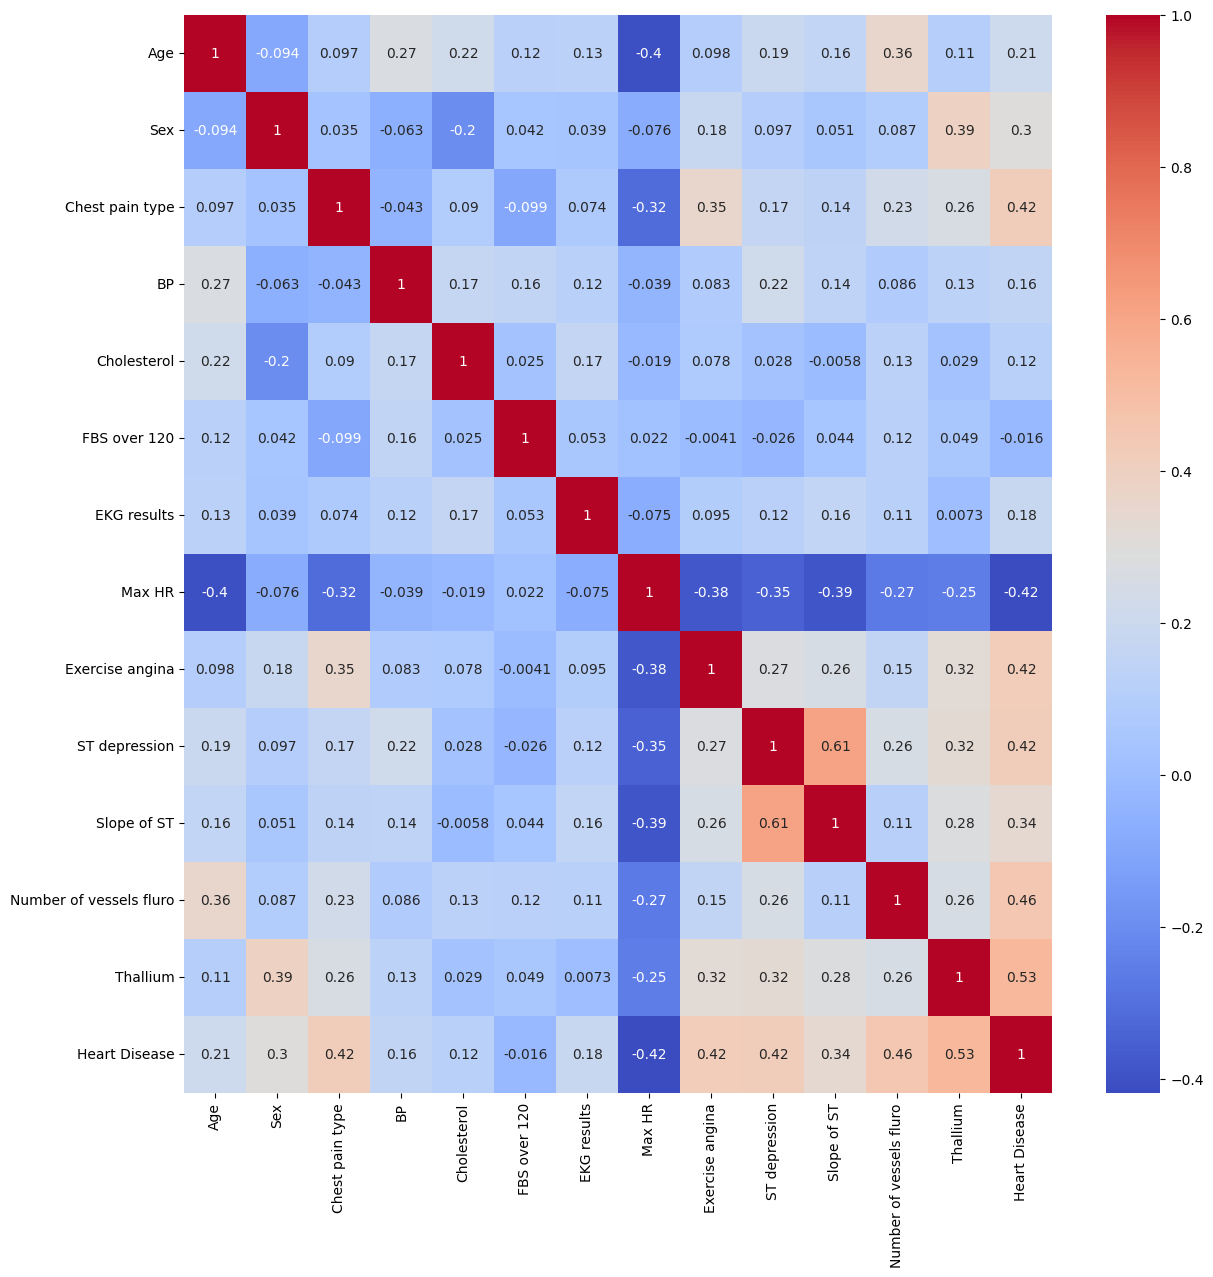

In [12]:
corr = df.corr()
plt.figure(figsize=(df.shape[1],df.shape[1]))
sns.heatmap(corr,annot=True,cmap="coolwarm")

In [14]:
from sklearn.feature_selection import VarianceThreshold
selctor = VarianceThreshold(threshold=0.1)
selctor.fit_transform(df)
selctor.get_feature_names_out()

array(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol',
       'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina',
       'ST depression', 'Slope of ST', 'Number of vessels fluro',
       'Thallium', 'Heart Disease'], dtype=object)

In [15]:
df_var = df[['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol',
       'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina',
       'ST depression', 'Slope of ST', 'Number of vessels fluro',
       'Thallium', 'Heart Disease']]

# **SMOTE**


In [16]:
from collections import Counter
Counter(df['Heart Disease'])

Counter({1: 120, 0: 150})

In [17]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
x_sm, y_sm = sm.fit_resample(df.drop(['Heart Disease'],axis=1), df['Heart Disease'])

In [18]:
Counter(y_sm)

Counter({1: 150, 0: 150})

In [19]:
df_sm = x_sm
df_sm['Heart Disease'] = y_sm

In [21]:
corr_sm = df_sm.corr()

In [22]:
tt = corr_sm['Heart Disease'].mean() * corr_sm['Heart Disease'].std()

corr_sm[ (corr_sm['Heart Disease'] >= tt) | (corr_sm['Heart Disease'] <= -1*tt) ]['Heart Disease'].index

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'EKG results',
       'Max HR', 'Exercise angina', 'ST depression', 'Slope of ST',
       'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

In [23]:
df_sm_corr = df_sm[['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'EKG results',
       'Max HR', 'Exercise angina', 'ST depression', 'Slope of ST',
       'Number of vessels fluro', 'Thallium', 'Heart Disease']]

# **Train**


In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

gnb = GaussianNB()
lg = LogisticRegression(max_iter = 2000)
tree = DecisionTreeClassifier(random_state=1)
knn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state=1)
svc = SVC(probability = True)
xgb = XGBClassifier(random_state=1)
model = [gnb,lg,tree,knn,rf,svc,xgb]

In [26]:
def mokhtar(df,model):
    X_train, X_test, y_train, y_test = train_test_split(df.drop(['Heart Disease'],axis=1), df['Heart Disease'], test_size=0.3, random_state=42)
    print("----------------------------------------------------------------------------------")
    print("first the cross validation")
    print("----------------------------------------------------------------------------------")

    for i in model:
        cv = cross_val_score(i,X_train,y_train,cv = 5)
        model_name = type(i).__name__
        print('name : ' + model_name)
        print(cv.mean())
        print('################')
    print("----------------------------------------------------------------------------------")
    print("second the accuracy for predict")
    print("----------------------------------------------------------------------------------")

    for i in model:
        i.fit(X_train,y_train)
        y_pred_t = i.predict(X_train)
        y_pred_s = i.predict(X_test)
        model_name = type(i).__name__
        print('name : ' + model_name)
        accuracy_t = accuracy_score(y_train, y_pred_t)
        print(f"Accuracy for train: {accuracy_t:.2f}")
        accuracy_s = accuracy_score(y_test, y_pred_s)
        print(f"Accuracy for test: {accuracy_s:.2f}")
        print("+++++++++++++++++==================+++++++++++++++++")


In [27]:
mokhtar(df,model)

----------------------------------------------------------------------------------
first the cross validation
----------------------------------------------------------------------------------
name : GaussianNB
0.8463726884779517
################
name : LogisticRegression
0.8253200568990042
################
name : DecisionTreeClassifier
0.7082503556187767
################
name : KNeighborsClassifier
0.6401137980085347
################
name : RandomForestClassifier
0.8251778093883356
################
name : SVC
0.6669985775248933
################
name : XGBClassifier
0.777524893314367
################
----------------------------------------------------------------------------------
second the accuracy for predict
----------------------------------------------------------------------------------
name : GaussianNB
Accuracy for train: 0.85
Accuracy for test: 0.84
+++++++++++++++++==================+++++++++++++++++
name : LogisticRegression
Accuracy for train: 0.85
Accuracy for test: 0.83

In [29]:
mokhtar(df_sm,model)

----------------------------------------------------------------------------------
first the cross validation
----------------------------------------------------------------------------------
name : GaussianNB
0.819047619047619
################
name : LogisticRegression
0.8047619047619048
################
name : DecisionTreeClassifier
0.780952380952381
################
name : KNeighborsClassifier
0.6857142857142857
################
name : RandomForestClassifier
0.8095238095238095
################
name : SVC
0.6571428571428571
################
name : XGBClassifier
0.8142857142857143
################
----------------------------------------------------------------------------------
second the accuracy for predict
----------------------------------------------------------------------------------
name : GaussianNB
Accuracy for train: 0.84
Accuracy for test: 0.88
+++++++++++++++++==================+++++++++++++++++
name : LogisticRegression
Accuracy for train: 0.82
Accuracy for test: 0.89


In [28]:
mokhtar(df_sm_corr,model)

----------------------------------------------------------------------------------
first the cross validation
----------------------------------------------------------------------------------
name : GaussianNB
0.8142857142857143
################
name : LogisticRegression
0.7952380952380952
################
name : DecisionTreeClassifier
0.7619047619047619
################
name : KNeighborsClassifier
0.6857142857142857
################
name : RandomForestClassifier
0.8095238095238095
################
name : SVC
0.6523809523809524
################
name : XGBClassifier
0.8095238095238095
################
----------------------------------------------------------------------------------
second the accuracy for predict
----------------------------------------------------------------------------------
name : GaussianNB
Accuracy for train: 0.84
Accuracy for test: 0.88
+++++++++++++++++==================+++++++++++++++++
name : LogisticRegression
Accuracy for train: 0.84
Accuracy for test: 0.8

In [30]:
mokhtar(df_var,model)


----------------------------------------------------------------------------------
first the cross validation
----------------------------------------------------------------------------------
name : GaussianNB
0.8463726884779517
################
name : LogisticRegression
0.8253200568990042
################
name : DecisionTreeClassifier
0.7082503556187767
################
name : KNeighborsClassifier
0.6401137980085347
################
name : RandomForestClassifier
0.8251778093883356
################
name : SVC
0.6669985775248933
################
name : XGBClassifier
0.777524893314367
################
----------------------------------------------------------------------------------
second the accuracy for predict
----------------------------------------------------------------------------------
name : GaussianNB
Accuracy for train: 0.85
Accuracy for test: 0.84
+++++++++++++++++==================+++++++++++++++++
name : LogisticRegression
Accuracy for train: 0.85
Accuracy for test: 0.83

In [31]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

# Generate a synthetic dataset for binary classification
X, y = make_classification(
    n_samples=1000,    # Number of samples
    n_features=20,     # Number of features
    n_classes=2,       # Binary classification (2 classes)
    random_state=42    # For reproducibility
)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Heart Disease'],axis=1), df['Heart Disease'], test_size=0.3, random_state=42)

# Scale the data for better performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),                                                   # Dropout for regularization
    Dense(32, activation='relu'),                                   # Hidden layer
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Make predictions
predictions = model.predict(X_test)
predictions = (predictions > 0.5).astype(int)  # Convert probabilities to binary predictions

# Example output of first 5 predictions
print("Predicted Labels:", predictions[:5].flatten())
print("True Labels:", y_test[:5])


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.5758 - loss: 0.6956 - val_accuracy: 0.6316 - val_loss: 0.6440
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6584 - loss: 0.6495 - val_accuracy: 0.7895 - val_loss: 0.5873
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6640 - loss: 0.6195 - val_accuracy: 0.8421 - val_loss: 0.5375
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7538 - loss: 0.5689 - val_accuracy: 0.8421 - val_loss: 0.4959
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7948 - loss: 0.5152 - val_accuracy: 0.8684 - val_loss: 0.4619
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8020 - loss: 0.4886 - val_accuracy: 0.8421 - val_loss: 0.4339
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8027 - loss: 0.4899 - val_accuracy: 0.8421 - val_loss: 0.4105
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8453 - loss: 0.4592 - val_accuracy: 0.8684 - val_loss: 0.3926
Epoch 9/50
5/